# **Data Analysis Interview Challenge**







#**Part 1 ‑ Exploratory data analysis**
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
#Let us import and load the data
from google.colab import files
uploaded=files.upload()

Saving logins.json to logins.json


In [4]:
#import the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the data
logins=pd.read_json('logins.json')

In [6]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
logins['count']=1
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
#Let us check the type of our data
logins.dtypes

login_time    datetime64[ns]
count                  int64
dtype: object

In [9]:
# convert 'login_time' column as datetime format and sort in ascending order
logins['login_time'] = pd.to_datetime(logins.login_time, format="%Y-%m-%d")
login = logins.sort_values('login_time')
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [10]:
logins.dtypes

login_time    datetime64[ns]
count                  int64
dtype: object

In [11]:
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [12]:
# let us set 'login_time' as the DateTime index
logins = logins.set_index('login_time') 

In [13]:
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [14]:
p=logins.groupby('count').resample('15T').sum()

In [15]:
p.head()

count
count login_time                
1     1970-01-01 20:00:00      2
      1970-01-01 20:15:00      6
      1970-01-01 20:30:00      9
      1970-01-01 20:45:00      7
      1970-01-01 21:00:00      1

In [16]:
p=p.droplevel(['count'])

**DISTRIBUTION OF THE DATA**

Text(0, 0.5, 'Counts')

<Figure size 4320x2160 with 0 Axes>

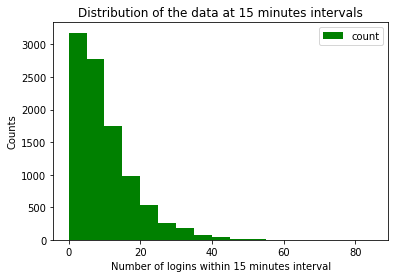

In [17]:
#Let us see the distribution of our data at 15 minutes intervals
plt.figure(figsize=(60, 30))
p.plot(kind='hist', bins=np.arange(0,90,5), color='green', title='Distribution of the data at 15 minutes intervals')
plt.xlabel('Number of logins within 15 minutes interval')
plt.ylabel('Counts')

**The most number of logins in the 15 minutes interval is betwween 0 and 40.**





**LET US PLOT THE TIME SERIES OF THE DATA**


**1.   PER 15 MIN INTERVAL**






Text(0, 0.5, 'Counts')

<Figure size 1440x288 with 0 Axes>

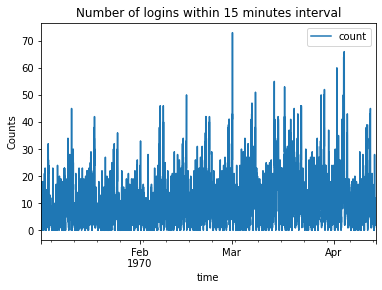

In [18]:
plt.figure(figsize=(20,4))
p.plot(title='Number of logins within 15 minutes interval')
plt.xlabel('time')
plt.ylabel('Counts')





**2.   PER 1 DAY INTERVAL**



Text(0, 0.5, 'Counts')

<Figure size 4320x1440 with 0 Axes>

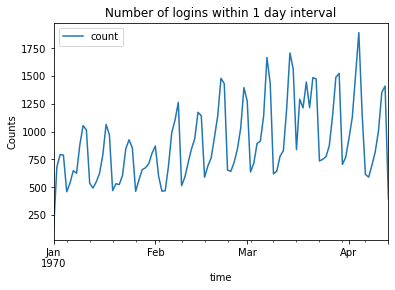

In [19]:
d=(logins.groupby('count').resample('1D').sum()).droplevel(['count'])
plt.figure(figsize=(60,20))
d.plot(title='Number of logins within 1 day interval')
plt.xlabel('time')
plt.ylabel('Counts')

**We can see that the highest number of logins happens around begenning of April.**

**3. PER 1 MONTH INTERVAL**

Text(0, 0.5, 'Counts')

<Figure size 1440x288 with 0 Axes>

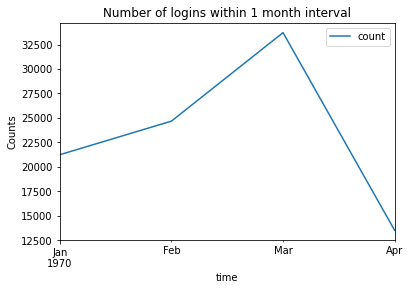

In [20]:
m=(logins.groupby('count').resample('1M').sum()).droplevel(['count'])
plt.figure(figsize=(20,4))
m.plot(title='Number of logins within 1 month interval')
plt.xlabel('time')
plt.ylabel('Counts')

**The month with the highest number of logins is March 1970.**

#**Part 2 ‑ Experiment and metrics design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
 * how you will implement the experiment
 * what statistical test(s) you will conduct to verify the significance of the
observation
 * how you would interpret the results and provide recommendations to the city
operations team along with any caveats.




# **Part 3 ‑ Predictive modeling**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

**1-DATA LOADING**

In [21]:
from google.colab import files
uploaded=files.upload()

Saving ultimate_data_challenge.json to ultimate_data_challenge.json


In [22]:
data=pd.read_json('ultimate_data_challenge.json')

In [23]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


**2-DATA WRANGLING**

In [24]:
#Let us check the type of each column in our data
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

We can see that 'signup_date' and 'last_trip_date' are object. Later on we might see the need to change them into datetime.

In [25]:
#Let us see the count of non-null values per column we have by using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We can see that the column 'avg_rating_of_driver', 'phone'and 'avg_rating_by_driver' have null values. In our analysis we don't need the column 'phone'. Let us delete it.

In [ ]:
#Delete the column 'phone'
#data=data.drop(columns='phone', axis=1)

In [26]:
#Let us us print the summary statistic.
(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


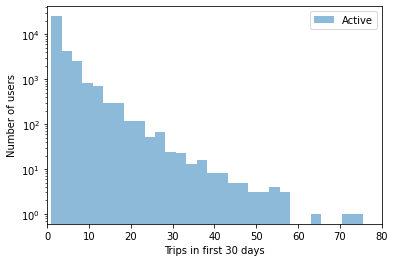

In [27]:
#Visualise The active user for the precedent 30 days.
active=data[data['trips_in_first_30_days']!=0]
active=active['trips_in_first_30_days']
_ = plt.hist(active, bins=50, alpha=0.5, label='Active')
_ = plt.xlabel('Trips in first 30 days')
_ = plt.ylabel('Number of users')
_ = plt.xlim([0,80])
_ = plt.yscale('log')
_ = plt.legend()

In [28]:
#Let us print out the percent of each feature that is missing
nas=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/len(data), columns=['percent'])
pos=nas['percent']>0
nas[pos]

,percent
avg_rating_of_driver,0.16244
phone,0.00792
avg_rating_by_driver,0.00402


In [ ]:
#Let us delete the column 'phone'
#data=data.drop('phone', axis=1)
#data.head()

In [29]:
#Let us replace the null values by the mean of each corresponding column missing values.
data['avg_rating_of_driver']=data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean())
data['avg_rating_by_driver']=data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean())

In [30]:
#Let us check again is we have missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [49]:
#Let us see if there are duplicated rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

**3-EXPLORATORY DATA ANALYSIS**

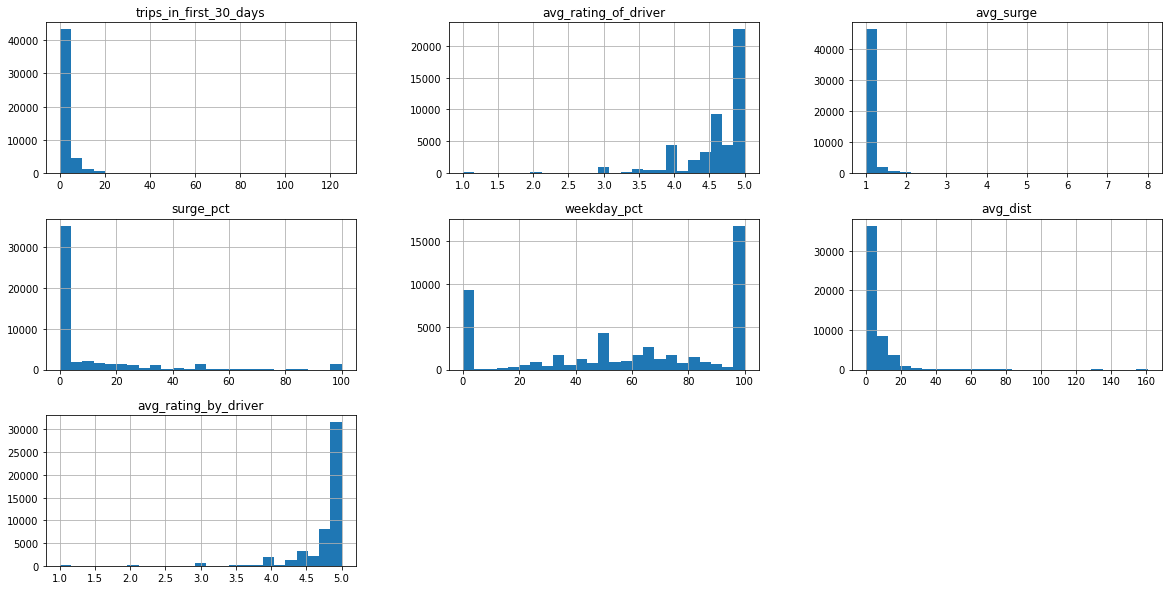

In [31]:
#Let us visualize the histograms for all numeric features in our data
hist=data.drop('ultimate_black_user', axis=1).hist(bins=25, figsize=(20,10))

In [32]:
#Let us find what fraction of the observed users were retained?
print('The fraction of the observed users that was retained is: ', 100*len(active)/len(data['trips_in_first_30_days']), '%') 

The fraction of the observed users that was retained is:  69.22 %


##**The fraction of the observed users that was retained is  69.22 %**

In [33]:
#Let us create a column called retained with 1 if user where active at 6 month and 0 if not.
data['retained']=pd.to_datetime(data['last_trip_date'])>=pd.to_datetime('2014-06-01')
data['retained']=data['retained'].astype(int)  

In [34]:
data['retained'].head()

0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int64

In [35]:
print('The numbers of users still active at 6 months are ', data['retained'].sum())

The numbers of users still active at 6 months are  18804


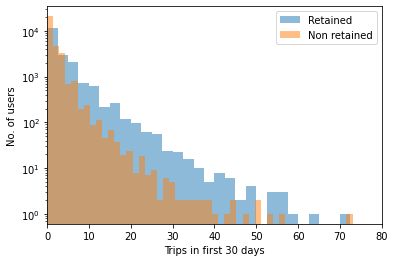

In [36]:
#Let us visualize the number of retained user and non retained user based on their trips in the first 30 days.
retained = data[data['retained']==1]
non_retained = data[data['retained']==0]
#non_retained = data.loc[data.retained==0]
_ = plt.hist(retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Retained')
_ = plt.hist(non_retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Non retained')
_ = plt.xlabel('Trips in first 30 days')
_ = plt.ylabel('No. of users')
_ = plt.xlim([0,80])
_ = plt.yscale('log')
_ = plt.legend()

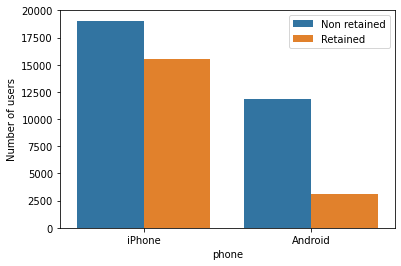

In [37]:
#Let us visualize the number of users retained and non retained by phone

_= sns.countplot(x='phone', hue='retained', data=data)
_ = plt.legend(['Non retained', 'Retained'])
_ = plt.ylabel('Number of users')
_ = plt.xticks([0,1],['iPhone','Android'])

**4-BUILDING OF A PREDICTIVE MODEL (PREPROCESSING)**

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
 12  retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [39]:
#Let us drop the 'signup_date' and 'last_trip_date'
data=data.drop(['signup_date', 'last_trip_date'], axis=1)

In [40]:
#Let us define our target variable
y=data['retained']


In [41]:
#Let us flatenned our variable y by calling the ravel() function on y
y=y.ravel()

In [42]:
#Let us transform categorical variable into dummy variables
data1=data.select_dtypes(include=['object']) #select object type columns
df=pd.concat([data.drop(data1, axis=1), pd.get_dummies(data1)], axis=1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [43]:
#Let us choose our input variable
X=df.drop('retained', axis=1)

In [44]:
#import in the sklearn library preprocessing and train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [45]:
# we use the StandardScaler() method of the preprocessing package
# and call the fit() mehtod with X as parameter.
scaler = preprocessing.StandardScaler().fit(X)

In [46]:
#We declare a variable called X_scaled , and assign it the result of calling the transform() method with parameter X
X_scaled=scaler.transform(X) 

In [47]:
#We use sklearn model selection import train_test_split , and create a 80/20 split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=1, stratify=y)

**LOGISTIC REGRESSION**

We will use sklearn to fit the model on our training dataset and we will use predict() method to predict our model.

In [53]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [60]:
#we fit our model
cls = LogisticRegression()
cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

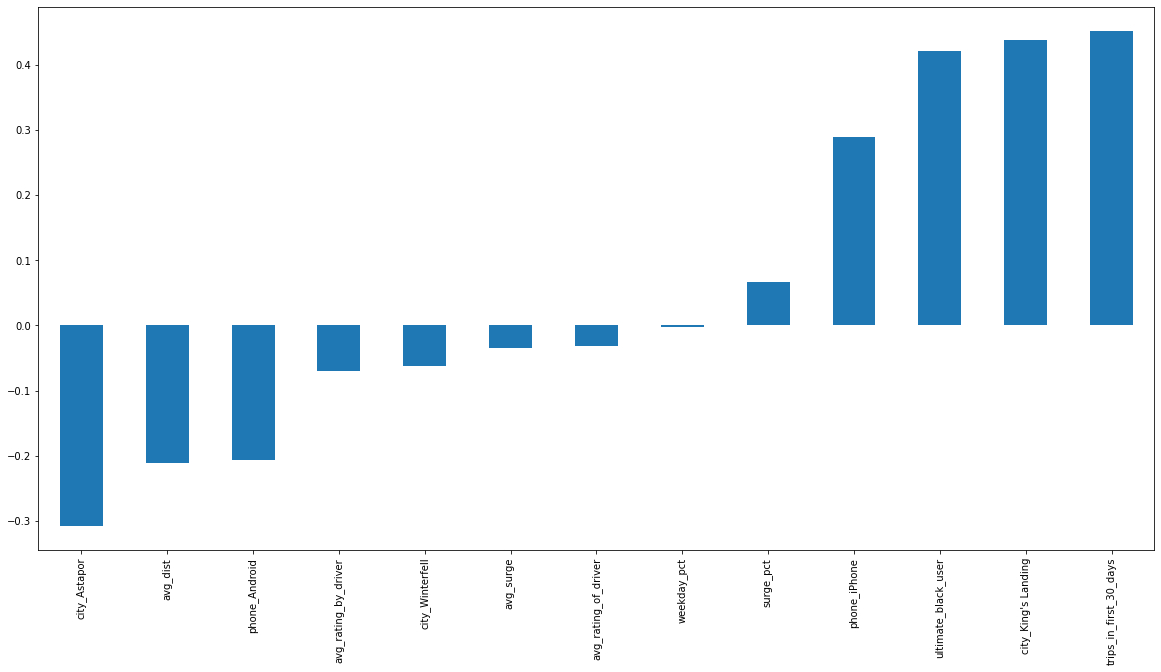

In [64]:
#Let us plot the coeficient of our model to see what is the most important feature
X_train_pd=pd.DataFrame(data=X_train, index=None, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_iPhone'])
coefs = pd.Series(cls.coef_[0], index=X_train_pd.columns)
coefs.sort_values(inplace=True)
plt.figure(figsize=(20,10))
coefs.plot(kind="bar")

**THE 4 MOST IMPORTANT FEATURES ARE trips_in_first_30_days, city_king's Landing, ultimate_black_user AND phone_iPhone.**

**Let us check the metrics of our model**





In [68]:
#Let us check the accuracy of our model
y_pred_test = cls.predict(X_test)
print(" [Test] F1 score: {:6f}".format(metrics.f1_score(y_test, y_pred_test)))
print(" [Test] Accuracy: {:6f}".format(metrics.accuracy_score(y_test, y_pred_test)))
print(" [Test]  AUC: {:6f}".format(metrics.roc_auc_score(y_test, y_pred_test)))
print(" [Test] Precision: {:6f}".format(metrics.precision_score(y_test, y_pred_test)))

 [Test] F1 score: 0.576302
 [Test] Accuracy: 0.721800
 [Test]  AUC: 0.678360
 [Test] Precision: 0.674510


Text(0.5, 15.0, 'Predicted value')

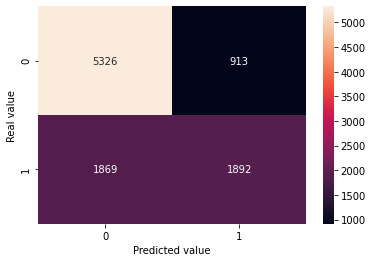

In [69]:
#draw the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

These performance metrics are global. Let us go in detail and see how well the model perform per class. We will use the classification_report function for that.

In [70]:
from sklearn.metrics import classification_report
print("[Classification Report]")
print(classification_report(y_test, y_pred_test))

[Classification Report]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6239
           1       0.67      0.50      0.58      3761

    accuracy                           0.72     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.72      0.72      0.71     10000

